In [1]:
# importamos las librer√≠as que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaci√≥n
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribuci√≥n de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuraci√≥n
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gesti√≥n de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


_______________________________________________________________________________________________________________________________________________________________________________________________
### Fase 2: VISUALIZACI√ìN
_______________________________________________________________________________________________________________________________________________________________________________________________

In [2]:
# Leo CSV
df = pd.read_csv('actividad_historial_clientes.csv')

In [3]:
df

loyalty number  year  month  flights booked  flights with companions  \
0               480934  2017      1               0                        0   
1               480934  2017      2               3                        0   
2               480934  2017      3               0                        0   
3               480934  2017      4               0                        0   
4               480934  2018     10               6                        2   
...                ...   ...    ...             ...                      ...   
403755          652627  2018      8               0                        0   
403756          652627  2018      9               0                        0   
403757          652627  2018     10               0                        0   
403758          652627  2018     11               0                        0   
403759          652627  2018     12               0                        0   

        total flights  distance  points accumulated  points redeemed  \
0                   0         0                 0.0                0   
1                   3      2823               282.0                0   
2                   0         0                 0.0                0   
3                   0         0                 0.0                0   
4                   8      3352               335.0              465   
...               ...       ...                 ...              ...   
403755              0         0                 0.0                0   
403756              0         0                 0.0                0   
403757              0         0                 0.0                0   
403758              0         0                 0.0                0   
403759              0         0                 0.0                0   

        dollar cost points redeemed country  province      city postal code  \
0                                 0  canada   ontario   toronto     m2z 4k1   
1                                 0  canada   ontario   toronto     m2z 4k1   
2                                 0  canada   ontario   toronto     m2z 4k1   
3                                 0  canada   ontario   toronto     m2z 4k1   
4                                38  canada   ontario   toronto     m2z 4k1   
...                             ...     ...       ...       ...         ...   
403755                            0  canada  manitoba  winnipeg     r2c 0m5   
403756                            0  canada  manitoba  winnipeg     r2c 0m5   
403757                            0  canada  manitoba  winnipeg     r2c 0m5   
403758                            0  canada  manitoba  winnipeg     r2c 0m5   
403759                            0  canada  manitoba  winnipeg     r2c 0m5   

        gender education   salary marital status loyalty card       clv  \
0       female  bachelor  83236.0        married         star   3839.14   
1       female  bachelor  83236.0        married         star   3839.14   
2       female  bachelor  83236.0        married         star   3839.14   
3       female  bachelor  83236.0        married         star   3839.14   
4       female  bachelor  83236.0        married         star   3839.14   
...        ...       ...      ...            ...          ...       ...   
403755  female  bachelor  75049.0        married         star  83325.38   
403756  female  bachelor  75049.0        married         star  83325.38   
403757  female  bachelor  75049.0        married         star  83325.38   
403758  female  bachelor  75049.0        married         star  83325.38   
403759  female  bachelor  75049.0        married         star  83325.38   

       enrollment type enrollment date active enrollment  
0             standard         2016-02                no  
1             standard         2016-02                no  
2             standard         2016-02                no  
3             standard         2016-02                no  
4             standard         2016-0

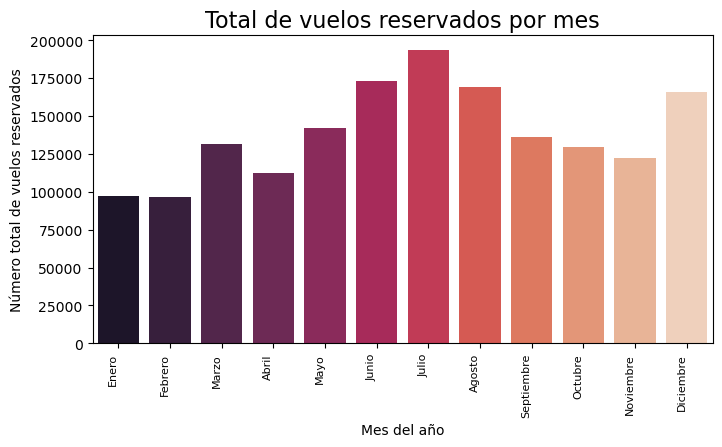

In [4]:
""" Gr√°fica 1: ¬øC√≥mo se distribuye la cantidad de vuelos reservados por mes durante el a√±o? """

# Barplot. Muestra una estimaci√≥n de la tendencia central (por defecto, la media) para cada categor√≠a.

# Agrupamos por mes para obtener una √∫nica barra por mes y sumamos los vuelos
vuelos_por_mes = df.groupby('month')['flights booked'].sum().reset_index()
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

plt.figure(figsize=(8, 4))
sns.barplot(data=vuelos_por_mes, x='month', y='flights booked', palette='rocket')
plt.title('Total de vuelos reservados por mes', fontsize=16)
plt.xlabel('Mes del a√±o')
plt.ylabel('N√∫mero total de vuelos reservados')
plt.xticks(ticks=range(0, 12), labels=meses, rotation=90, ha='right', fontsize=8)
plt.show()

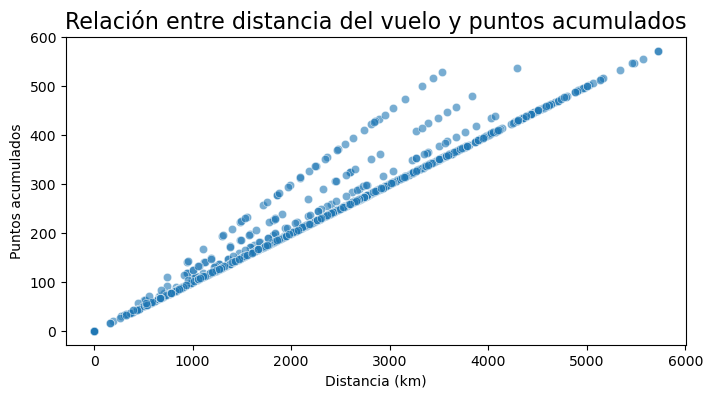

In [5]:
""" Gr√°fica 2:  ¬øExiste una relaci√≥n entre la distancia de los vuelos y los puntos acumulados por los cliente? """

#Scatterplot (gr√°fico de dispersi√≥n para dos o m√°s variables, en este caso 2).

plt.figure(figsize=(8, 4))
sns.scatterplot(data=df.sample(n=2000, random_state=1), x='distance', y='points accumulated', alpha=0.6)
plt.title('Relaci√≥n entre distancia del vuelo y puntos acumulados', fontsize=16)
plt.xlabel('Distancia (km)', fontsize=10)
plt.ylabel('Puntos acumulados', fontsize=10)
plt.show()


In [6]:
""" Gr√°fica 3:  ¬øCu√°l es la distribuci√≥n de los clientes por provincia o estado? """
# Countplot (gr√°fico de conteo).

# Como en el ejercicio anterior, vuelvo a intentar evitar que aparezcan clientes duplicados.
df_clientes_unicos = df.drop_duplicates(subset=['loyalty number'])

plt.figure(figsize=(15, 5))
sns.countplot(data = df_clientes_unicos, x='province', order=df_clientes_unicos['province'].value_counts().index, palette='Paired')
plt.title('Distribuci√≥n de clientes por provincia', fontsize=16)
plt.ylabel('N√∫mero de clientes', fontsize=12)
plt.xlabel('Provincia', fontsize=12)
plt.show()

--- Creando un DataFrame simulado (reemplazar con la carga de tu CSV) ---
DataFrame simulado 'df_limpio' creado con √©xito.



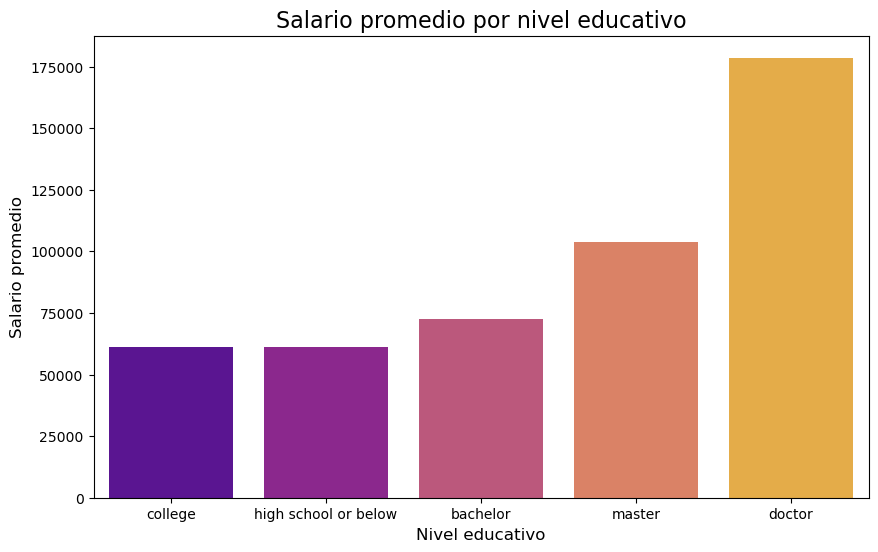

In [8]:
""" Gr√°fica 4: ¬øC√≥mo se compara el salario promedio entre los diferentes niveles educativos de los clientes? """

#Barplot: La pregunta pide expl√≠citamente el "salario promedio", y barplot calcula la media por defecto.

#Vuelvo a usar clientes_unicos

plt.figure(figsize=(10, 6)) 
sns.barplot(data=df_clientes_unicos, x='education', y='salary', 
            order=['college','high school or below', 'bachelor', 'master', 'doctor',], palette='plasma' , errorbar=None)
plt.title('Salario promedio por nivel educativo', fontsize=16)
plt.xlabel('Nivel educativo', fontsize=12)
plt.ylabel('Salario promedio', fontsize=12)
plt.show()

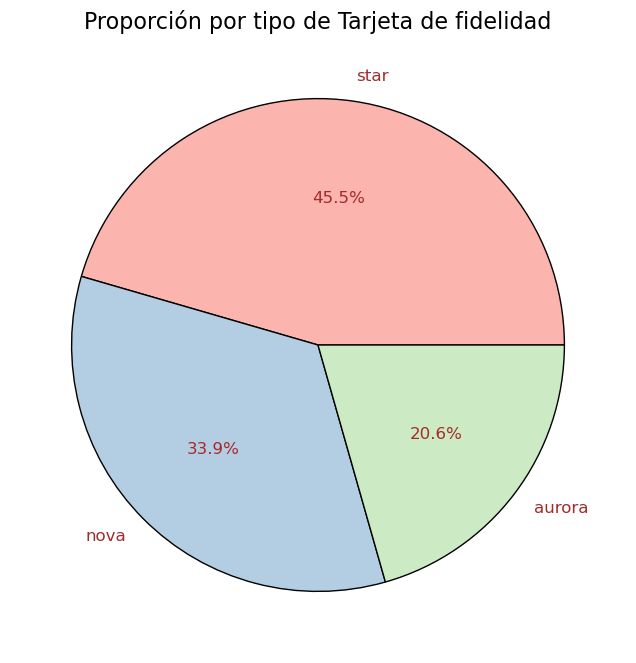

In [9]:
""" Gr√°fica 5: ¬øCu√°l es la proporci√≥n de clientes con diferentes tipos de tarjetas de fidelidad? """

#Vuelvo a usar la variable clientes √∫nicos 

# Pie Chart

plt.figure(figsize=(8, 8))
counts = df['loyalty card'].value_counts()
colors = sns.color_palette('Pastel1')
counts.plot.pie(autopct='%1.1f%%', 
            wedgeprops={'edgecolor': 'black'},
            textprops={'fontsize': 12, 'color':'brown'},
            colors=colors)
plt.title('Proporci√≥n por tipo de Tarjeta de fidelidad', fontsize=16)
plt.ylabel('')
plt.show()

Generando Gr√°fico 6: Estado Civil y G√©nero...


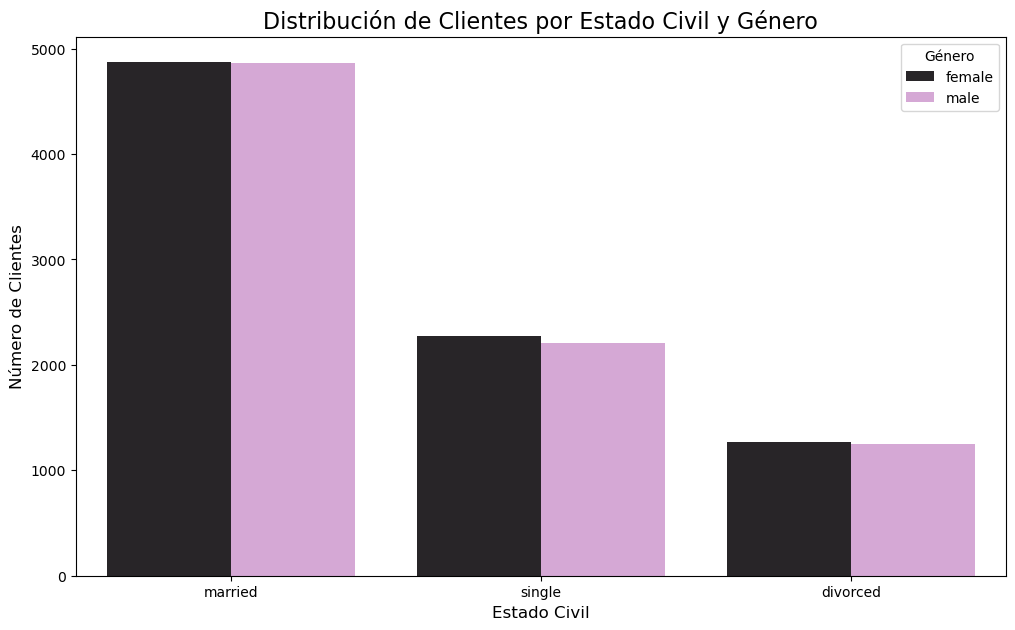

In [10]:
""" Gr√°fica 6: ¬øC√≥mo se distribuyen los clientes seg√∫n su estado civil y g√©nero? """

# Countplot con el par√°metro 'hue'.

print("Generando Gr√°fico 6: Estado Civil y G√©nero...")
plt.figure(figsize=(12, 7))
sns.countplot(data=df_clientes_unicos, x='marital status', hue='gender', color='plum', order = df_clientes_unicos['marital status'].value_counts().index)
plt.title('Distribuci√≥n de Clientes por Estado Civil y G√©nero', fontsize=16)
plt.xlabel('Estado Civil', fontsize=12)
plt.ylabel('N√∫mero de Clientes', fontsize=12)
plt.legend(title='G√©nero')
plt.show()


_______________________________________________________________________________________________________________________________________________________________________________________________
### Fase 3: BONUS
_______________________________________________________________________________________________________________________________________________________________________________________________

In [11]:
"""1. Preparaci√≥n de Datos: Filtra el conjunto de datos para incluir √∫nicamente las columnas relevantes:'Flights Booked' y 'Education'."""

try:
    df_bonus = df[['flights booked', 'education']]
    print("Se ha creado el nuevo DF con las columas relevantes")
    display(df_bonus.sample(10))
except Exception as e:
    print(f"Por un error inesperado no se ha podido crear el Df: {e}")

Se ha creado el nuevo DF con las columas relevantes


flights booked education
63565                8  bachelor
225764               0  bachelor
385044               0   college
154842               7  bachelor
47393                0  bachelor
104513               0  bachelor
88793               13  bachelor
194714               3    doctor
198432               0  bachelor
207501               8  bachelor

In [12]:
"""2. . An√°lisis Descriptivo: Agrupa los datos por nivel educativo y calcula estad√≠sticas descriptivas b√°sicas (como el promedio, la desviaci√≥n est√°ndar) del n√∫mero de vuelos reservados para cada grupo"""

estadisticas_por_educacion = df_bonus.groupby('education')['flights booked'].agg(['mean', 'std', 'count'])
print("-"*75)
print("Estad√≠sticas descriptivas de 'Flights Booked' por Nivel Educativo:")
print("-"*75)
print(estadisticas_por_educacion)
print("-"*75)

---------------------------------------------------------------------------
Estad√≠sticas descriptivas de 'Flights Booked' por Nivel Educativo:
---------------------------------------------------------------------------
                          mean       std   count
education                                       
bachelor              4.110288  5.221671  252567
college               4.169744  5.246040  102260
doctor                4.175512  5.256971   17731
high school or below  4.176209  5.239267   18915
master                4.200700  5.213956   12287
---------------------------------------------------------------------------


In [13]:
"""3. Prueba Estad√≠stica: Realiza una prueba de hip√≥tesis para determinar si existe una diferencia significativa en el n√∫mero de vuelos reservados entre los diferentes niveles educativos."""

#Me qued√© sin tiempo.

#Funci√≥n del Notebook de clase
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hip√≥tesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versi√≥n de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Par√°metros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hip√≥tesis.
    """
    
    """# Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50: #aqu√≠ vamos a decidir hacer komogorov porque es m√°s potente y shapiro solo en muestras peque√±as
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales, all() solo devuelve True si todos los elementos son True

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estad√≠stico": t_stat,
        "p-valor": p_valor,
        "Conclusi√≥n": "Rechazamos H0. Es decir, s√≠ hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera m√°s clara
    print("\nüìä **Resultados de la Prueba de Hip√≥tesis** üìä")
    print(f"‚úÖ Test de Normalidad: {'S√≠' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"‚úÖ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"‚úÖ Test aplicado: {test_usado}")
    print(f"üìâ Estad√≠stico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"üîç Conclusi√≥n: {resultado['Conclusi√≥n']}\n")"""